In [53]:
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

# Lecture 6: Indirect methods for constrained optimization

## Some remarks
* How to deal with problems where the objective function should be maximized, i.e. $\max f(x)$?
  * We can use the same methods if we instead minimize the negative of $f$, i.e. $\min -f(x)$
  * The optimal solution $x^*$ is the same for both the problems

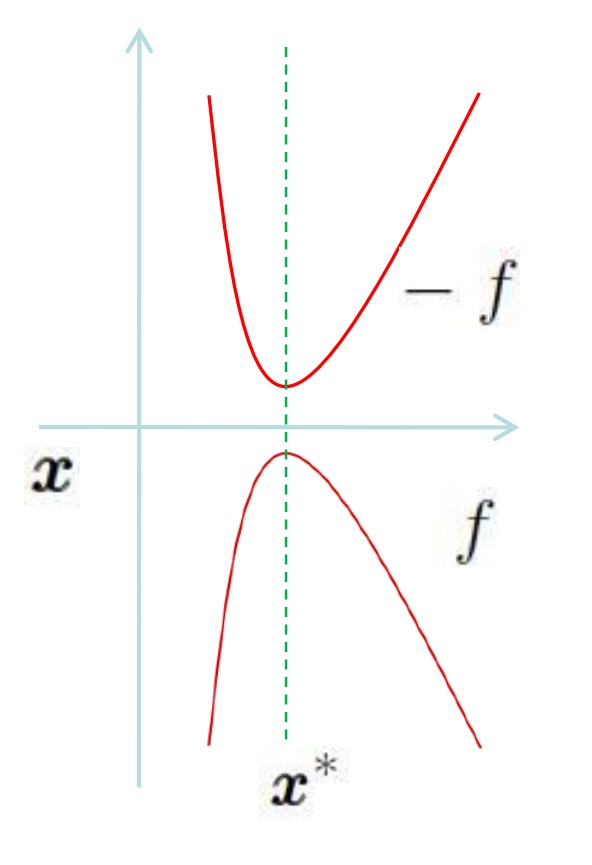

In [54]:
# insert image
from IPython.display import Image
Image(filename = "Images\MaxEqMin.jpg", width = 200, height = 300)

## Simple example

In [55]:
def f_max(x):
    return -(x-3.0)**2 + 10.0

# clearly x* = 3.0 is the global maximum  

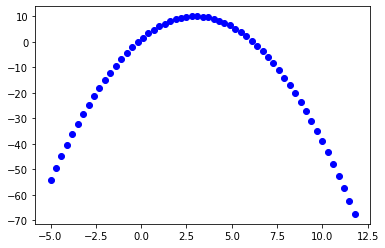

10.0


In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 12.0, 0.3)
plt.plot(x, f_max(x), 'bo')
plt.show()
print(f_max(3.0))

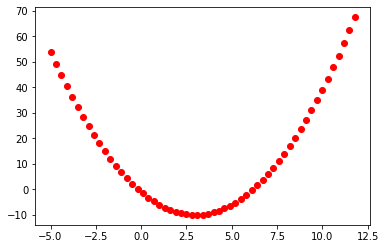

In [57]:
from scipy.optimize import minimize_scalar

# multiply f_max with -1.0
def g(x):
    return -f_max(x)

plt.plot(x, g(x), 'ro')
plt.show()

In [58]:
res = minimize_scalar(g,method='brent')
print(res)
print(g(res.x))
print(f_max(res.x))

     fun: -10.0
    nfev: 10
     nit: 4
 success: True
       x: 3.0
-10.0
10.0


# Constrained optimization

Now we will move to studying constrained optimization problems i.e., the full problem
$$
\begin{align} \
\min \quad &f(x)\\
\text{s.t.} \quad & g_j(x) \geq 0\text{ for all }j=1,\ldots,J\\
& h_k(x) = 0\text{ for all }k=1,\ldots,K\\
&a_i\leq x_i\leq b_i\text{ for all } i=1,\ldots,n\\
&x\in \mathbb R^n,
\end{align}
$$
where for all $i=1,\ldots,n$ it holds that $a_i,b_i\in \mathbb R$ or they may also be $-\infty$ or $\infty$.

## On optimal solutions for constrained problems
* Two types of constraints: equality and inequality constraints
* Inequality constraint $g_i(x)\geq0$ is said to be *active* at point $x$ if $g_i(x)=0$
* Linear constraints are much easier to consider --> their gradients are constant
* Nonlinear constraints trickier --> gradient changes for different values of decision variables

No constraints
![](images/unconstrained.png)
<span style="font-size: 10pt;">*Adopted from Prof. L.T. Biegler (Carnegie Mellon University)*</span>

Inequality constraints
![](images/inequality_constraints.jpg)
<span style="font-size: 10pt;">*Adopted from Prof. L.T. Biegler (Carnegie Mellon University)*</span>

Both inequality and equality constraints
![](images/constraints.jpg)
<span style="font-size: 10pt;">*Adopted from Prof. L.T. Biegler (Carnegie Mellon University)*</span>

## Transforming the constraints
Type of inequality:
$$
g_i(x)\geq0 \iff -g_i(x)\leq0
$$


Inequality to equality:
$$
g_i(x)\leq0 \iff g_i(x)+y_i^2=0
$$
* $y_i$ is a *slack variable*; constraint is active if $y_i=0$
* By adding $y_i^2$ no need to add $y_i\geq0$
* If $g$ is linear, linearity can be preserved by $g_i(x)+y_i=0, y_i\geq0$

Equality to inequality:
$$
h_i(x)=0 \iff h_i(x)\geq0 \text{ and } -h_i(x) \geq0
$$

## Example problem
For example, we can have an optimization problem
$$
\begin{align} \
\min \quad &x_1^2+x_2^2\\
\text{s.t.} \quad & x_1+x_2-1\geq 0\\
&-1\leq x_1\leq 1, x_2\leq 3.\\
\end{align}
$$

In order to optimize that problem, we can define the following python function:

In [59]:
import numpy as np
def f_constrained(x):
    return np.linalg.norm(x)**2,[x[0]+x[1]-1, x[0]+1,-x[0]+1,-x[1]+3],[]

In [ ]:
#np.linalg.norm??

Now, we can call the function:

In [60]:
(f_val,ieq,eq) = f_constrained([1,0])
print("Value of f is "+str(f_val))
if len(ieq)>0:
    print("The values of inequality constraints are:")
    for ieq_j in ieq:
        print(str(ieq_j)+", ")
if len(eq)>0:
    print("The values of the equality constraints are:")
    for eq_k in eq:
        print(str(eq_k)+", ")

Value of f is 1.0
The values of inequality constraints are:
0, 
2, 
0, 
3, 


Is this solution feasible?

In [61]:
if all([ieq_j>=0 for ieq_j in ieq]) and all([eq_k==0 for eq_k in eq]):
    print("Solution is feasible")
else:
    print("Solution is infeasible")

Solution is feasible


# Indirect and direct methods for constrained optimization

There are two categories of methods for constrained optimization: Indirect and direct methods (based on how they treat constraints). 

The main difference is that

1. **Indirect** methods convert the constrained optimization problem into a single or a sequence of unconstrained optimization problems, that are then solved. Often, the intermediate solutions do not need to be feasible, but the sequence of solutions converges to a solution that is optimal for the original problem (and, thus, feasible).

2. **Direct** methods deal with the constrained optimization problem directly. In this case, all the intermediate solutions are feasible.

# Indirect methods

## Penalty function methods

**IDEA:** Include constraints into the objective function with the help of penalty functions that **penalize constraint violations**.

* **Exterior** penalty functions (approaching the optimum from outside of the feasible region)
* **Interior** penalty functions (approaching the optimum from inside of the feasible region)

### Exterior penalty functions

Let, $\alpha(x):\mathbb R^n\to\mathbb R$ be a function so that 
* $\alpha(x)= 0$, for all feasible $x$
* $\alpha(x)>0$, for all infeasible $x$.

Define a set of optimization problems (depending on parameter $r$)
$$
\begin{align} \
\min \qquad &f(x)+r\alpha(x)\\
\text{s.t.} \qquad &x\in \mathbb R^n
\end{align}
$$
where  𝛼(𝑥) is a **penalty function** and 𝑟 is a **penalty parameter**.

for $r>0$. Let $x_r$ be an optimal solution of such problem for a given $r$.

In this case, the optimal solutions $x_r$ converge to the optimal solution of the constrained problem, when 

* $r\to\infty$, (in exterior penalty functions) 

if such a solution exists.

* All the functions should be continuous
* For each 𝑟, there should exist a solution for penalty functions problem and $𝑥_𝑟$ belongs to a compact subset of $\mathbb R^n$

For example, good ideas for penalty functions are
* $h_k(x)^2$ for equality constraints,
* $\left(\min\{0,g_j(x)\}\right)^2$ for inequality constraints $g_j(x) \geq 0$, or
* $\left(\max\{0,g_j(x)\}\right)^2$ for inequality constraints $g_j(x) \leq 0$.

# Illustrative example
$$
\min x \\
\text{ s.t. } -x + 2 \leq 0
$$
Let
$$
\alpha(x) = (\max[0,(-x+2)])^2 
$$

Then

$$
\alpha(x) = 0,  \text{ if }x\geq2
$$
$$
 \alpha(x) = (-x+2)^2, \text{ if } x<2
$$



Minimum of $f(x)+r\alpha(x)$ is at $2-1/2r$
![](images/penalty.png)

Then, if $ r \rightarrow \infty$,  $$ \text{Min} f(x) + r \alpha(x) = 2 = \text{Min} f(x) $$

In general, a constrained optimization problem in a form of
$$
\begin{align} \
\min \quad &f(x)\\
\text{s.t.} \quad & g_j(x) \geq 0\text{ for all }j=1,\ldots,J\\
& h_k(x) = 0\text{ for all }k=1,\ldots,K\\
&x\in \mathbb R^n,
\end{align}
$$

can be converted to the following unconstrained optimization problem with a penalty function

$$ 
\alpha(x) = \sum_{j=1}^J{(\min\{0,g_j(x)\})^2} + \sum_{k=1}^K{h_k(x)^2}
$$


In [62]:
def alpha(x,f):
    (_,ieq,eq) = f(x)
    return sum([min([0,ieq_j])**2 for ieq_j in ieq]) + sum([eq_k**2 for eq_k in eq])

Let us go back to our example:
$$
\begin{align} \
\min \quad &x_1^2+x_2^2\\
\text{s.t.} \quad & x_1+x_2-1\geq 0\\
&-1\leq x_1\leq 1, x_2\leq 3.\\
\end{align}
$$

In [63]:
alpha([1,0],f_constrained)

0

In [64]:
def penalized_function(x,f,r):
    return f(x)[0] + r*alpha(x,f)

In [65]:
# by increasing r we increase the penalty for being infeasible
print(penalized_function([-1,0],f_constrained,10000))
print(penalized_function([-1,0],f_constrained,100))
print(penalized_function([-1,0],f_constrained,10))
print(penalized_function([-1,0],f_constrained,1))

40001.0
401.0
41.0
5.0


Let's solve the penalty problem by using Nelder-Mead from scipy.optimize

In [74]:
from scipy.optimize import minimize
res = minimize(lambda x:penalized_function(x,f_constrained,10000000000),# by increasing r we assure convergency
               [0,0],method='Nelder-Mead', 
         options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.500000
         Iterations: 60
         Function evaluations: 104
[0.5 0.5]


In [75]:
(f_val,ieq,eq) = f_constrained(res.x)
print("Value of f is "+str(f_val))
if len(ieq)>0:
    print("The values of inequality constraints are:")
    for ieq_j in ieq:
        print(str(ieq_j)+", ")
if len(eq)>0:
    print("The values of the equality constraints are:")
    for eq_k in eq:
        print(str(eq_k)+", ")

if all([ieq_j>=0 for ieq_j in ieq]) and all([eq_k==0 for eq_k in eq]):
    print("Solution is feasible")
else:
    print("Solution is infeasible")

Value of f is 0.5000000000000003
The values of inequality constraints are:
4.440892098500626e-16, 
1.5, 
0.5, 
2.4999999999999996, 
Solution is feasible


### How to set the penalty parameter $r$?

The penalty parameter should
* be large enough in order for the solutions be close enough to the feasible region, but
* not be too large to
  * cause numerical problems, or
  * cause premature convergence to non-optimal solutions because of relative tolerances.

Usually, the penalty term is either
* set as big as possible without causing problems (hard to know), or
* updated iteratively.


**Note:** 

* We solved our example problem with a fixed value for the penalty parameter $r$. In order to make the penalty function method work in practice, you have to implement the iterative update for $r$. This you can practice in one of the upcoming exercises!

$$
\begin{align} \
\min \quad &f(x) + \sum_{j=1}^J{r_j(\min\{0,g_j(x)\})^2} + \sum_{k=1}^K{r_kh_k(x)^2} \\
\text{s.t.} &\\ 
&x\in \mathbb R^n,
\end{align}
$$

* The starting point for solving the penalty problems can be selected in an efficient way. When you set $r_i$ and solve the corresponding unconstrained penalty problem, you get an optimal solution $x_{r_i}$. Then you update $r_i\rightarrow r_{i+1}$ and you can use $x_{r_i}$ as a starting point for solving the penalty problem with $r_{i+1}$.

# Barrier function methods

**IDEA:** Prevent leaving the feasible region so that the value of the objective is $\infty$ outside the feasible set (an **interior** method).

This method is only applicable to problems with inequality constraints and for which the set 
$$\{x\in \mathbb R^n: g_j(x)>0\text{ for all }j=1,\ldots,J\}$$
is non-empty.

Let $\beta:\{x\in \mathbb R^n: g_j(x)>0\text{ for all }j=1,\ldots,J\}\to \mathbb R$ be a function so that $\beta(x)\to \infty$, when $x\to\partial\{x\in \mathbb R^n: g_j(x)>0\text{ for all }j=1,\ldots,J\}$, where $\partial A$ is the boundary of the set $A$. 

Now, define optimization problem 
$$
\begin{align}
\min \qquad & f(x) + r\beta(x)\\
\text{s.t. } \qquad & x\in \{x\in \mathbb R^n: g_j(x)>0\text{ for all }j=1,\ldots,J\}.
\end{align}
$$
and let $x_r$ be the optimal solution of this problem (which we assume to exist for all $r>0$).

In this case, $x_r$ converges to the optimal solution of the problem (if it exists), when $r\to 0^+$ (i.e., $r$ converges to zero from the right side (= positive numbers)).

A good idea for a barrier function is $-\frac1{g_j(x)}$.

## Example
$$
min \text{ } 𝑥 \\
𝑠.𝑡. −𝑥 + 1 ≤ 0
$$

Let $𝛽(𝑥) = −\frac1{−𝑥+1}$ when $𝑥 ≠ 1$

$$
\min 𝑓(𝑥) + 𝑟𝛽(𝑥) = 𝑥 + \frac{𝑟}{𝑥 − 1}
$$

is at 1 + $\sqrt r$

Then, if $ r \rightarrow 0$,  $$ \text{Min} f(x) + r \beta(x) = 1 = \text{Min} f(x) $$

![](images/barrierFun.jpg)

In [76]:
def beta(x,f):
    _,ieq,_ = f(x)
    try:
        value=sum([1/max([0,ieq_j]) for ieq_j in ieq])
    except ZeroDivisionError:
        value = float("inf")
    return value 

In [77]:
def function_with_barrier(x,f,r):
    return f(x)[0]+r*beta(x,f)

In [78]:
# let's try to find a feasible starting point
print(f_constrained([1,1]))

(2.0000000000000004, [1, 2, 0, 2], [])


In [79]:
from scipy.optimize import minimize
res = minimize(lambda x:function_with_barrier(x,f_constrained,0.1),
               [1,1],method='Nelder-Mead', options={'disp': True})
print(res.x)

[1. 1.]


C:\devel\anaconda3\lib\site-packages\scipy\optimize\optimize.py:734: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [80]:
""" 
To reduce the number of function evaluations, I eliminated some constraints for the sake of education. 
Also, here we know the optimum and can check if it does not satisfy the eliminated constraints.
But, in practice, we should either increase the limitation of the function evaluations in the code 
or use a different method that needs fewer function evaluations.
"""
def f_constrained(x):
    return np.linalg.norm(x)**2,[x[0]+x[1]-1],[]

In [86]:
from scipy.optimize import minimize
res = minimize(lambda x:function_with_barrier(x,f_constrained,.000000000010), # test different values for r and track the optimum
               [1,1],method='Nelder-Mead', options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.500006
         Iterations: 64
         Function evaluations: 111
[0.49999611 0.50000691]


In [87]:
(f_val,ieq,eq) = f_constrained(res.x)
print("Value of f is "+str(f_val))
if len(ieq)>0:
    print("The values of inequality constraints are:")
    for ieq_j in ieq:
        print(str(ieq_j)+", ")
if len(eq)>0:
    print("The values of the equality constraints are:")
    for eq_k in eq:
        print(str(eq_k)+", ")
if all([ieq_j>=0 for ieq_j in ieq]) and all([eq_k==0 for eq_k in eq]):
    print("Solution is feasible")
else:
    print("Solution is infeasible")

Value of f is 0.5000030228178015
The values of inequality constraints are:
3.022754969661534e-06, 
Solution is feasible


It is 'easy' to see that x* = (0.5,0.5) and f(x*) = 0.5

https://www.wolframalpha.com/input/?i=minimize+x%5E2%2By%5E2+on+x%2By%3E%3D1

In [88]:
print(f_constrained([.5,.5]))

(0.5000000000000001, [0.0], [])


## Other notes about using penalty and barrier function methods

* It is worthwhile to consider whether feasibility can be compromised. If the constraints do not have any tolerances, then the barrier function method should be considered.

* Also barrier methods parameter can be set iteratively

* Penalty and barrier functions should be chosen so that they are differentiable (thus $x^2$ above)

* In both methods, the minimum is attained at the limit.

* Different penalty and barrier parameters can be used for different constraints, even for the same problem.